<a href="https://colab.research.google.com/github/ashleychoi121/Deep-Learning-Recycle-Machine/blob/main/Capstone_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Capstone Project

## Introduction 
  * 2.12 billion tons of waste are dumped/ year
  * Lack of recycling
## Datasets Source 
  * Kaggle 
  * Total 22,564 number of images
## Objective 
  * To find the best deep learning model that will predict the image

## Deep Learning Paremeters 
  * Number of layers
  * Activation functions
  * Batch size
  * Learning rate


In [ ]:
!pip install tensorflow-gpu==2.0.0-rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-rc1 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-rc1


In [ ]:
import tensorflow as tf
from tensorflow import keras
image_data = tf.keras.datasets.fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [ ]:
# Importing images directly from Kaggle using API to skip downloading all dataset to the computer. 

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))


!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
uploaded file "kaggle.json" with length 69 bytes


In [ ]:
!kaggle datasets download -d techsash/waste-classification-data

100% 426M/427M [00:18<00:00, 24.7MB/s]
100% 427M/427M [00:18<00:00, 23.7MB/s]


In [ ]:
from zipfile import ZipFile
name = "/content/waste-classification-data.zip"
with ZipFile(name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
import os
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import cv2
import numpy as np

os.chdir('/content/DATASET/TRAIN/O')
X = []
y = []

for i in tqdm(os.listdir()):
  pic = cv2.imread(i)
  pic = cv2.resize(pic, (32,32))
  X.append(pic)
  y.append(0)
os.chdir('/content/DATASET/TRAIN/R')
for i in tqdm(os.listdir()):
  pic = cv2.imread(i)
  pic = cv2.resize(pic, (32,32))
  X.append(pic)
  y.append(1)

<ipython-input-5-bcd3fd3d4f1c>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


  0%|          | 0/12565 [00:00<?, ?it/s]

  0%|          | 0/9999 [00:00<?, ?it/s]

The train dataset consists of 22,564 number of images. 12,565 of organic waste images and 9,999 of recycle waste images. For Y variable, 0 means organic and 1 means recycle. 

In [ ]:
os.chdir('/content/DATASET/TEST/O')
X_t = []
y_t = []

for i in tqdm(os.listdir()):
  pic = cv2.imread(i)
  pic = cv2.resize(pic, (32,32))
  X_t.append(pic)
  y_t.append(0)
os.chdir('/content/DATASET/TEST/R')
for i in tqdm(os.listdir()):
  pic = cv2.imread(i)
  pic = cv2.resize(pic, (32,32))
  X_t.append(pic)
  y_t.append(0)

  0%|          | 0/1401 [00:00<?, ?it/s]

  0%|          | 0/1112 [00:00<?, ?it/s]

In [ ]:
X_train = np.array(X)
y_train = np.array(y)
X_test = np.array(X_t)
y_test = np.array(y_t)

The test dataset consists of 2,513 number of images. 1,401 of organic waste images and 1,112 of recycle waste images. 

In [ ]:
print('Type of X value is ', type(X_train))
print('Size of X_train is ', len(X_train))
print('Size of X_test is ', len(X_test))

values, counts = np.unique(y_train, return_counts=True)
print('Number of organic vs. recycle in train data is', counts)

Type of X value is  <class 'numpy.ndarray'>
Size of X_train is  22564
Size of X_test is  2513
Number of organic vs. recycle in train data is [12565  9999]


Text(0.5, 1.0, 'Organic')

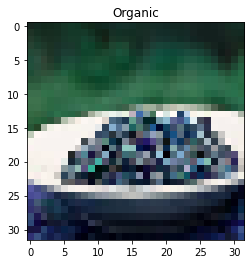

In [ ]:
# Plotting data so visually see it. 32x32 looks unclear visually. Higher number will display the image clearer but will not necessary for the deep learning models. 
plt.imshow(X_train[10])
name = 'Organic' if y_train[10]== 0 else 'recycle'
plt.title(name)

Text(0.5, 1.0, 'recycle')

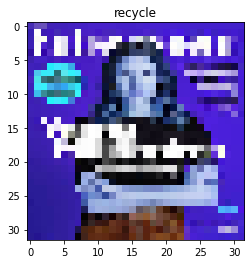

In [ ]:
plt.imshow(X_train[20000])
name = 'Organic' if y_train[20000]== 0 else 'recycle'
plt.title(name)

In [ ]:
# To see the shape of the dataset and find how to reshape them to use it for deep learning models. 
print('Train set size:', X_train.shape)
print('Test set size:', y_train.shape)

Train set size: (22564, 32, 32, 3)
Test set size: (22564,)


In [ ]:
input_dim = 3072  # 32*32*3
output_dim = nb_classes = 2
batch_size = 128
nb_epoch = 20

X_train = X_train.reshape(22564, input_dim)
X_test = X_test.reshape(2513, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
# Reshaping the y values as the target variable is binary, 0 or 1. 

y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [ ]:
# To check the size of the reshaped variables. 

print('Train set size:', X_train.shape)
print('Test set size:', y_train.shape)

Train set size: (22564, 3072)
Test set size: (22564, 1)


In [ ]:
#1 Comparing models with different Number of Layers.

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model_11 = Sequential()
# The first dense layer
model_11.add(Dense(128, activation="relu"))
# The second dense layer
model_11.add(Dense(64, activation="relu"))
# The last layer is the output layer
model_11.add(Dense(1, activation="sigmoid"))

model_11.compile(optimizer='sgd', loss='binary_crossentropy',
              metrics=['accuracy'])

model_11.fit(X_train, y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
177/177 [==============================] - 2s 8ms/step - loss: 0.5478 - accuracy: 0.7311
Epoch 2/20
177/177 [==============================] - 2s 8ms/step - loss: 0.4898 - accuracy: 0.7716
Epoch 3/20
177/177 [==============================] - 2s 9ms/step - loss: 0.4759 - accuracy: 0.7819
Epoch 4/20
177/177 [==============================] - 1s 8ms/step - loss: 0.4627 - accuracy: 0.7879
Epoch 5/20
177/177 [==============================] - 1s 8ms/step - loss: 0.4595 - accuracy: 0.7911
Epoch 6/20
177/177 [==============================] - 1s 8ms/step - loss: 0.4550 - accuracy: 0.7940
Epoch 7/20
177/177 [==============================] - 2s 10ms/step - loss: 0.4520 - accuracy: 0.7955
Epoch 8/20
177/177 [==============================] - 2s 14ms/step - loss: 0.4471 - accuracy: 0.8003
Epoch 9/20
177/177 [==============================] - 3s 16ms/step - loss: 0.4450 - accuracy: 0.8015
Epoch 10/20
177/177 [==============================] - 4s 20ms/step - loss: 0.4432 - accuracy: 0.

In [ ]:
model_11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 401,665
Trainable params: 401,665
Non-trainable params: 0
_________________________________________________________________


In [ ]:
score = model_11.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.276551365852356
Test accuracy: 0.4858734607696533


In [ ]:
model_12 = Sequential()
# The first dense layer
model_12.add(Dense(128, activation="relu"))
# The second dense layer
model_12.add(Dense(64, activation="relu"))
# The third dense layer
model_12.add(Dense(64, activation="relu"))
# The fourth dense layer
model_12.add(Dense(64, activation="relu"))
# The last layer is the output layer
model_12.add(Dense(1, activation="sigmoid"))

model_12.compile(optimizer='sgd', loss='binary_crossentropy',
              metrics=['accuracy'])

model_12.fit(X_train, y_train, batch_size=batch_size, epochs=20, verbose=1)

score = model_12.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
177/177 [==============================] - 2s 9ms/step - loss: 0.5597 - accuracy: 0.7282
Epoch 2/20
177/177 [==============================] - 2s 9ms/step - loss: 0.4919 - accuracy: 0.7726
Epoch 3/20
177/177 [==============================] - 2s 9ms/step - loss: 0.4734 - accuracy: 0.7850
Epoch 4/20
177/177 [==============================] - 2s 9ms/step - loss: 0.4671 - accuracy: 0.7861
Epoch 5/20
177/177 [==============================] - 2s 9ms/step - loss: 0.4603 - accuracy: 0.7933
Epoch 6/20
177/177 [==============================] - 2s 9ms/step - loss: 0.4544 - accuracy: 0.7962
Epoch 7/20
177/177 [==============================] - 2s 9ms/step - loss: 0.4511 - accuracy: 0.7965
Epoch 8/20
177/177 [==============================] - 2s 9ms/step - loss: 0.4484 - accuracy: 0.8008
Epoch 9/20
177/177 [==============================] - 2s 9ms/step - loss: 0.4458 - accuracy: 0.8008
Epoch 10/20
177/177 [==============================] - 2s 9ms/step - loss: 0.4414 - accuracy: 0.8020

In [ ]:
model_13 = Sequential()
# The first dense layer
model_13.add(Dense(128, activation="relu"))
# The second dense layer
model_13.add(Dense(64, activation="relu"))
# The third dense layer
model_13.add(Dense(64, activation="relu"))
# The fourth dense layer
model_13.add(Dense(64, activation="relu"))
# The firth dense layer
model_13.add(Dense(64, activation="relu"))
# The sixth dense layer
model_13.add(Dense(64, activation="relu"))
# The last layer is the output layer
model_13.add(Dense(1, activation="sigmoid"))

model_13.compile(optimizer='sgd', loss='binary_crossentropy',
              metrics=['accuracy'])

model_13.fit(X_train, y_train, batch_size=batch_size, epochs=20, verbose=1)

score = model_13.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
177/177 [==============================] - 2s 9ms/step - loss: 0.6162 - accuracy: 0.7056
Epoch 2/20
177/177 [==============================] - 2s 9ms/step - loss: 0.5130 - accuracy: 0.7577
Epoch 3/20
177/177 [==============================] - 3s 15ms/step - loss: 0.4800 - accuracy: 0.7802
Epoch 4/20
177/177 [==============================] - 2s 12ms/step - loss: 0.4715 - accuracy: 0.7848
Epoch 5/20
177/177 [==============================] - 2s 9ms/step - loss: 0.4633 - accuracy: 0.7895
Epoch 6/20
177/177 [==============================] - 2s 9ms/step - loss: 0.4549 - accuracy: 0.7956
Epoch 7/20
177/177 [==============================] - 2s 9ms/step - loss: 0.4540 - accuracy: 0.7937
Epoch 8/20
177/177 [==============================] - 2s 9ms/step - loss: 0.4518 - accuracy: 0.7962
Epoch 9/20
177/177 [==============================] - 2s 11ms/step - loss: 0.4474 - accuracy: 0.7976
Epoch 10/20
177/177 [==============================] - 2s 9ms/step - loss: 0.4472 - accuracy: 0.7

Three deep learning models with the same paramters but different number of layers were built and tested. In terms of accuracy, more layers give higher accruacy. As such, 7 layers will be continue to be used for further research. 

In [ ]:
#2 Comparing models with different type of activiation functions.

model_21 = Sequential()
# The first dense layer
model_21.add(Dense(128, activation="tanh"))
# The second dense layer
model_21.add(Dense(64, activation="tanh"))
# The third dense layer
model_21.add(Dense(64, activation="tanh"))
# The fourth dense layer
model_21.add(Dense(64, activation="tanh"))
# The firth dense layer
model_21.add(Dense(64, activation="tanh"))
# The sixth dense layer
model_21.add(Dense(64, activation="tanh"))
# The last layer is the output layer
model_21.add(Dense(1, activation="sigmoid"))

model_21.compile(optimizer='sgd', loss='binary_crossentropy',
              metrics=['accuracy'])

model_21.fit(X_train, y_train, batch_size=batch_size, epochs=20, verbose=1)

score = model_21.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
177/177 [==============================] - 3s 9ms/step - loss: 0.5547 - accuracy: 0.7237
Epoch 2/20
177/177 [==============================] - 2s 9ms/step - loss: 0.4854 - accuracy: 0.7714
Epoch 3/20
177/177 [==============================] - 2s 10ms/step - loss: 0.4684 - accuracy: 0.7823
Epoch 4/20
177/177 [==============================] - 2s 9ms/step - loss: 0.4622 - accuracy: 0.7875
Epoch 5/20
177/177 [==============================] - 2s 9ms/step - loss: 0.4536 - accuracy: 0.7937
Epoch 6/20
177/177 [==============================] - 2s 9ms/step - loss: 0.4475 - accuracy: 0.7990
Epoch 7/20
177/177 [==============================] - 2s 9ms/step - loss: 0.4462 - accuracy: 0.8004
Epoch 8/20
177/177 [==============================] - 2s 9ms/step - loss: 0.4428 - accuracy: 0.8015
Epoch 9/20
177/177 [==============================] - 2s 9ms/step - loss: 0.4387 - accuracy: 0.8029
Epoch 10/20
177/177 [==============================] - 2s 9ms/step - loss: 0.4374 - accuracy: 0.802

In [ ]:
model_22 = Sequential()
# The first dense layer
model_22.add(Dense(128, activation="linear"))
# The second dense layer
model_22.add(Dense(64, activation="linear"))
# The third dense layer
model_22.add(Dense(64, activation="linear"))
# The fourth dense layer
model_22.add(Dense(64, activation="linear"))
# The firth dense layer
model_22.add(Dense(64, activation="linear"))
# The sixth dense layer
model_22.add(Dense(64, activation="linear"))
# The last layer is the output layer
model_22.add(Dense(1, activation="sigmoid"))

model_22.compile(optimizer='sgd', loss='binary_crossentropy',
              metrics=['accuracy'])

model_22.fit(X_train, y_train, batch_size=batch_size, epochs=20, verbose=1)

score = model_22.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
177/177 [==============================] - 2s 9ms/step - loss: 0.5714 - accuracy: 0.7215
Epoch 2/20
177/177 [==============================] - 2s 9ms/step - loss: 0.4891 - accuracy: 0.7769
Epoch 3/20
177/177 [==============================] - 2s 9ms/step - loss: 0.4711 - accuracy: 0.7878
Epoch 4/20
177/177 [==============================] - 2s 9ms/step - loss: 0.4683 - accuracy: 0.7907
Epoch 5/20
177/177 [==============================] - 2s 9ms/step - loss: 0.4645 - accuracy: 0.7912
Epoch 6/20
177/177 [==============================] - 2s 11ms/step - loss: 0.4649 - accuracy: 0.7909
Epoch 7/20
177/177 [==============================] - 3s 14ms/step - loss: 0.4615 - accuracy: 0.7938
Epoch 8/20
177/177 [==============================] - 2s 9ms/step - loss: 0.4613 - accuracy: 0.7936
Epoch 9/20
177/177 [==============================] - 2s 9ms/step - loss: 0.4597 - accuracy: 0.7956
Epoch 10/20
177/177 [==============================] - 2s 9ms/step - loss: 0.4581 - accuracy: 0.79

Three different activation functions were used for the second objective. ReLU (model_13), tanh (model_21), and Linear (model_22) were used for each models, and the same activation function was used for all layers except the last layer, which the last layer was Sigmoid for all models. tahn function model gives the best accuracy compared to two other models, and Linear model gives the lowest accuracy. Thus, for further models, the activation function of tanh will be used. 

In [ ]:
#3 Comparing models with different batch size.

model_31 = Sequential()
# The first dense layer
model_31.add(Dense(128, activation="tanh"))
# The second dense layer
model_31.add(Dense(64, activation="tanh"))
# The third dense layer
model_31.add(Dense(64, activation="tanh"))
# The fourth dense layer
model_31.add(Dense(64, activation="tanh"))
# The firth dense layer
model_31.add(Dense(64, activation="tanh"))
# The sixth dense layer
model_31.add(Dense(64, activation="tanh"))
# The last layer is the output layer
model_31.add(Dense(1, activation="sigmoid"))

model_31.compile(optimizer='sgd', loss='binary_crossentropy',
              metrics=['accuracy'])

model_31.fit(X_train, y_train, batch_size=20, epochs=20, verbose=1)

score = model_31.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
1129/1129 [==============================] - 6s 4ms/step - loss: 0.4959 - accuracy: 0.7628
Epoch 2/20
1129/1129 [==============================] - 5s 4ms/step - loss: 0.4565 - accuracy: 0.7923
Epoch 3/20
1129/1129 [==============================] - 5s 4ms/step - loss: 0.4453 - accuracy: 0.7987
Epoch 4/20
1129/1129 [==============================] - 5s 4ms/step - loss: 0.4389 - accuracy: 0.8027
Epoch 5/20
1129/1129 [==============================] - 5s 4ms/step - loss: 0.4349 - accuracy: 0.8040
Epoch 6/20
1129/1129 [==============================] - 5s 5ms/step - loss: 0.4305 - accuracy: 0.8084
Epoch 7/20
1129/1129 [==============================] - 6s 5ms/step - loss: 0.4274 - accuracy: 0.8083
Epoch 8/20
1129/1129 [==============================] - 6s 5ms/step - loss: 0.4212 - accuracy: 0.8101
Epoch 9/20
1129/1129 [==============================] - 8s 7ms/step - loss: 0.4196 - accuracy: 0.8127
Epoch 10/20
1129/1129 [==============================] - 9s 8ms/step - loss: 0.413

In [ ]:
model_32 = Sequential()
# The first dense layer
model_32.add(Dense(128, activation="tanh"))
# The second dense layer
model_32.add(Dense(64, activation="tanh"))
# The third dense layer
model_32.add(Dense(64, activation="tanh"))
# The fourth dense layer
model_32.add(Dense(64, activation="tanh"))
# The firth dense layer
model_32.add(Dense(64, activation="tanh"))
# The sixth dense layer
model_32.add(Dense(64, activation="tanh"))
# The last layer is the output layer
model_32.add(Dense(1, activation="sigmoid"))

model_32.compile(optimizer='sgd', loss='binary_crossentropy',
              metrics=['accuracy'])

model_32.fit(X_train, y_train, batch_size=60000, epochs=20, verbose=1)

score = model_32.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 0.7304 - accuracy: 0.4421
Epoch 2/20
1/1 [==============================] - 1s 1s/step - loss: 0.7073 - accuracy: 0.4558
Epoch 3/20
1/1 [==============================] - 1s 979ms/step - loss: 0.6964 - accuracy: 0.4930
Epoch 4/20
1/1 [==============================] - 1s 977ms/step - loss: 0.6867 - accuracy: 0.5435
Epoch 5/20
1/1 [==============================] - 1s 995ms/step - loss: 0.6780 - accuracy: 0.5885
Epoch 6/20
1/1 [==============================] - 1s 986ms/step - loss: 0.6702 - accuracy: 0.6228
Epoch 7/20
1/1 [==============================] - 1s 985ms/step - loss: 0.6630 - accuracy: 0.6469
Epoch 8/20
1/1 [==============================] - 1s 999ms/step - loss: 0.6564 - accuracy: 0.6639
Epoch 9/20
1/1 [==============================] - 1s 1s/step - loss: 0.6504 - accuracy: 0.6746
Epoch 10/20
1/1 [==============================] - 1s 1s/step - loss: 0.6448 - accuracy: 0.6841
Epoch 11/20
1/1 [==============

The third objective is to compare the models with different batch sizes: 20, 128, and 60,000. Smaller the batch size gets, the model gives the higher accuracy. Thus, the batch size of 20 will be used for the last objective. 

In [ ]:
#4 Comparing models with different learning rates.

from tensorflow.keras.optimizers import Adam

model_41 = Sequential()
# The first dense layer
model_41.add(Dense(128, activation="tanh"))
# The second dense layer
model_41.add(Dense(64, activation="tanh"))
# The third dense layer
model_41.add(Dense(64, activation="tanh"))
# The fourth dense layer
model_41.add(Dense(64, activation="tanh"))
# The firth dense layer
model_41.add(Dense(64, activation="tanh"))
# The sixth dense layer
model_41.add(Dense(64, activation="tanh"))
# The last layer is the output layer
model_41.add(Dense(1, activation="sigmoid"))

model_41.compile(Adam(learning_rate=0.01), loss='binary_crossentropy',
              metrics=['accuracy'])

model_41.fit(X_train, y_train, batch_size=20, epochs=20, verbose=1)

score = model_41.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
1129/1129 [==============================] - 7s 5ms/step - loss: 0.7044 - accuracy: 0.5291
Epoch 2/20
1129/1129 [==============================] - 6s 5ms/step - loss: 0.7032 - accuracy: 0.5245
Epoch 3/20
1129/1129 [==============================] - 6s 5ms/step - loss: 0.7019 - accuracy: 0.5258
Epoch 4/20
1129/1129 [==============================] - 6s 5ms/step - loss: 0.7010 - accuracy: 0.5274
Epoch 5/20
1129/1129 [==============================] - 6s 5ms/step - loss: 0.7015 - accuracy: 0.5330
Epoch 6/20
1129/1129 [==============================] - 6s 5ms/step - loss: 0.7001 - accuracy: 0.5275
Epoch 7/20
1129/1129 [==============================] - 6s 5ms/step - loss: 0.7006 - accuracy: 0.5312
Epoch 8/20
1129/1129 [==============================] - 6s 5ms/step - loss: 0.7031 - accuracy: 0.5212
Epoch 9/20
1129/1129 [==============================] - 6s 5ms/step - loss: 0.6976 - accuracy: 0.5376
Epoch 10/20
1129/1129 [==============================] - 6s 5ms/step - loss: 0.700

In [ ]:
model_42 = Sequential()
# The first dense layer
model_42.add(Dense(128, activation="tanh"))
# The second dense layer
model_42.add(Dense(64, activation="tanh"))
# The third dense layer
model_42.add(Dense(64, activation="tanh"))
# The fourth dense layer
model_42.add(Dense(64, activation="tanh"))
# The firth dense layer
model_42.add(Dense(64, activation="tanh"))
# The sixth dense layer
model_42.add(Dense(64, activation="tanh"))
# The last layer is the output layer
model_42.add(Dense(1, activation="sigmoid"))

model_42.compile(Adam(learning_rate=0.001), loss='binary_crossentropy',
              metrics=['accuracy'])

model_42.fit(X_train, y_train, batch_size=20, epochs=20, verbose=1)

score = model_42.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
1129/1129 [==============================] - 6s 5ms/step - loss: 0.5362 - accuracy: 0.7542
Epoch 2/20
1129/1129 [==============================] - 6s 5ms/step - loss: 0.5104 - accuracy: 0.7757
Epoch 3/20
1129/1129 [==============================] - 6s 6ms/step - loss: 0.5093 - accuracy: 0.7780
Epoch 4/20
1129/1129 [==============================] - 6s 5ms/step - loss: 0.4993 - accuracy: 0.7703
Epoch 5/20
1129/1129 [==============================] - 6s 5ms/step - loss: 0.5221 - accuracy: 0.7668
Epoch 6/20
1129/1129 [==============================] - 6s 5ms/step - loss: 0.5442 - accuracy: 0.7491
Epoch 7/20
1129/1129 [==============================] - 6s 5ms/step - loss: 0.5423 - accuracy: 0.7350
Epoch 8/20
1129/1129 [==============================] - 6s 5ms/step - loss: 0.5023 - accuracy: 0.7656
Epoch 9/20
1129/1129 [==============================] - 6s 6ms/step - loss: 0.6208 - accuracy: 0.6364
Epoch 10/20
1129/1129 [==============================] - 6s 5ms/step - loss: 0.575

For the last objective, learning rate will be differentiated to find the best learning rate for this deep learning model. 0.001 gives very favorable accuracy score. 0.01 gives the accuracy of 1 which seems to be overfitting of the model. In conclusion, 0.001 of learning rate gives the best accuracy among default, 0.01 and 0.001.

# The Best Model To Recognize the Image of Waste: Tanh, 7 layers, 20 batch, and learning rate of 0.001.